# Install libraries

In [1]:
!pip install pandas-profiling

In [2]:
!pip install pandas

In [3]:
!pip install numpy

In [4]:
!pip install matplotlib

In [5]:
!pip install matplotlib

In [6]:
!pip install scikit-learn

In [7]:
!pip install scipy

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import os

# Load Dataset

In [3]:
train_data=pd.read_csv("Dataset/Train.csv")
test_data=pd.read_csv("Dataset/Test.csv")

In [4]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Pre-processing

## 1.Combine Data

In [7]:
#join train and test dataset
#create source column having train and test values to perform train test split later
train_data["source"]="train"
test_data["source"]="test"

data=pd.concat([train_data,test_data],ignore_index=True)

In [8]:
print("Train dataset shape-",train_data.shape)
print("Test dataset shape-",test_data.shape)
print("Combine dataset shape-",data.shape)

Train dataset shape- (8523, 13)
Test dataset shape- (5681, 12)
Combine dataset shape- (14204, 13)


In [9]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [10]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


## 2. Missing values handling

In [11]:
#Number of Null values in Dataset
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [12]:
#Percentage of null values in dataset
data.isnull().sum()/data.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
source                        0.000000
dtype: float64

#### In Item_Outlet_Sales there are 39.99% of null values due to concatenation of train and test data so no need to process it.

### Filling null values of Item_Weight and Outlet_Size 

#### Filling null values of Item_Weight
Check for outliers if present fill null values with median else fill with mean

<Axes: xlabel='Item_Weight'>

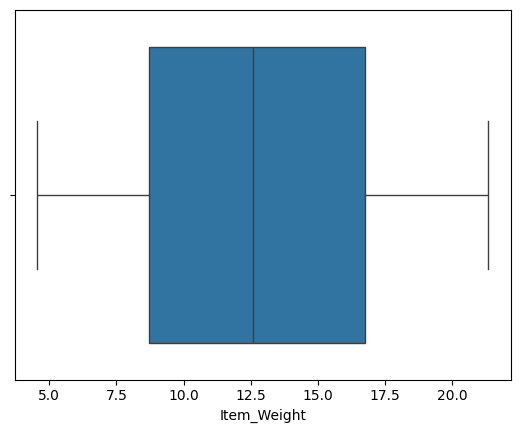

In [13]:
sns.boxplot(data=data["Item_Weight"],orient="h")

#### No outliers in Item_Weight so we can fill null values with mean

#### For better accuracy fill null values of Item_Weight with mean corresponding to Item_Identifire

In [14]:
data["Item_Identifier"].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [15]:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

In [16]:
item_avg_weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


#### Define Function to compute weights

In [17]:
def compute_weights(cols):
    weight=cols[0]
    identifier=cols[1]
    
    if pd.isnull(weight):
        return item_avg_weight["Item_Weight"][item_avg_weight.index==identifier]
    else:
        return weight

In [18]:
# Filling null values of Item_Weight with mean
data["Item_Weight"]=data[["Item_Weight","Item_Identifier"]].apply(compute_weights,axis=1).astype(float)

In [19]:
data["Item_Weight"].isnull().sum()

0

##### No null values in Item Weight

### Fill Null values of Outlet_Size with mode
Outlet_Size depends on Outlet_Type so fill Outlet_Size corresponding to Outlet_Type

In [20]:
outlet_size_mode=data.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [21]:
#Define Function to compute outlet size

def compute_size_mode(cols):
    size=cols[0]
    Type=cols[1]
    
    if pd.isnull(size):
        return outlet_size_mode.loc["Outlet_Size"][outlet_size_mode.columns==Type][0]
    else:
        return size

In [22]:
#Fill null values with mode

data["Outlet_Size"]=data[["Outlet_Size","Outlet_Type"]].apply(compute_size_mode,axis=1)

In [23]:
data["Outlet_Size"].isnull().sum()

0

#### No null values in Outlet_Size

# Feature Engineering

### According to EDA report Item_Visibility has 526 (6.2%) zeros 
In our dataset minimum value of Item visibility is zero.Which not make any sense.Every product should be visible  to client.so compute it with mean value.

In [24]:
visibility_item_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')
visibility_item_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [25]:
# def function to compute mean value of item_Visibility according to Item_Itentifier

def compute_visibility_mean(cols):
    visibility=cols[0]
    identifier=cols[1]
    
    if visibility==0:
        return visibility_item_avg["Item_Visibility"][visibility_item_avg.index==identifier]
    else:
        return visibility

In [26]:
#Compute visibilty values
data["Item_Visibility"]=data[["Item_Visibility","Item_Identifier"]].apply(
                            compute_visibility_mean,axis=1).astype(float)

In [27]:
sum(data.Item_Visibility==0)

0

## Years of operation of a store
## The data is from 2013 so we need to consider that in calculations

In [28]:
data["Outlet_Years"]=2013-data["Outlet_Establishment_Year"]

In [29]:
data["Outlet_Years"].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

### Create a broad category of Item_Type

In [30]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,14
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,15
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,26


In [31]:
data["Item_Type_Combined"]=data["Item_Identifier"].apply(lambda x:x[0:2])

In [32]:
data["Item_Type_Combined"]=data["Item_Type_Combined"].map({"FD":"Food","NC":"Non-Consumable","DR":"Drinks"})

In [33]:
data["Item_Type_Combined"].value_counts()

Item_Type_Combined
Food              10201
Non-Consumable     2686
Drinks             1317
Name: count, dtype: int64

### Change categories of Item_Fat_Content
Replacing values of LF and low fat with Low Fat and reg with Regular

In [34]:
data["Item_Fat_Content"]=data["Item_Fat_Content"].replace({"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"})

In [35]:
data["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

#### There are some non consumable that should not be included in Low Fat,fat content so replace them in Non-Edible 

In [36]:
data.loc[data["Item_Type_Combined"]=="Non-Consumable","Item_Fat_Content"]="Non-Edible"

In [37]:
data["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat       6499
Regular       5019
Non-Edible    2686
Name: count, dtype: int64

# Feature Transformations

#### The products that are more visible are likely to have higher sales so create new variable Item_Visibility_MeanRatio


In [38]:
item_visibility_func=lambda x: x["Item_Visibility"]/visibility_item_avg["Item_Visibility"][visibility_item_avg.index==x["Item_Identifier"]][0]
data["Item_Visibility_MeanRatio"]=data.apply(item_visibility_func,axis=1).astype(float)

In [39]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,Item_Type_Combined,Item_Visibility_MeanRatio
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,14,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,4,Drinks,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,14,Food,0.960069
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,15,Food,1.000000
4,NCD19,8.93,Non-Edible,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,26,Non-Consumable,1.000000


In [40]:
data["Item_Visibility_MeanRatio"].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

## Handling Categorical Variables

In [41]:
le=LabelEncoder()

In [42]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source', 'Outlet_Years',
       'Item_Type_Combined', 'Item_Visibility_MeanRatio'],
      dtype='object')

In [43]:
#Apply label Encoding to categorical variables

In [44]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,Item_Type_Combined,Item_Visibility_MeanRatio
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,14,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,4,Drinks,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,14,Food,0.960069
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,15,Food,1.000000
4,NCD19,8.93,Non-Edible,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,26,Non-Consumable,1.000000


In [45]:
cat_var=["Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Type_Combined"]
for i in cat_var:
    data[i]=le.fit_transform(data[i])

In [145]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,Item_Type_Combined,Item_Visibility_MeanRatio
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,14,1,0.931078
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,4,0,0.933420
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,14,1,0.960069
3,FDX07,19.20,2,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800,train,15,1,1.000000
4,NCD19,8.93,1,0.009780,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,26,2,1.000000


In [146]:
"""
Item_Fat_Content-
                Low Fat=0
                Non-Edible=1
                Regular=2
Outlet_Size-
            High=0
            Medium=1
            Small=2

Outlet_Location_Type-
                    Tier 1=0
                    Tier 2=1
                    Tier 3=2
                    
Outlet_Type-
            Grocery Store=0
            Supermarket Type1=1
            Supermarket Type2=2
            Supermarket Type3=3

Item_Type_Combined-
                Drinks=0
                Food=1
                Non-Consumable=2
                
"""
pass

### Apply One Hot Encoding

In [147]:
data=pd.get_dummies(data,columns=["Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Type_Combined"])

In [148]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Visibility_MeanRatio    float64
Item_Fat_Content_0              bool
Item_Fat_Content_1              bool
Item_Fat_Content_2              bool
Outlet_Size_0                   bool
Outlet_Size_1                   bool
Outlet_Size_2                   bool
Outlet_Location_Type_0          bool
Outlet_Location_Type_1          bool
Outlet_Location_Type_2          bool
Outlet_Type_0                   bool
Outlet_Type_1                   bool
Outlet_Type_2                   bool
Outlet_Type_3                   bool
Item_Type_Combined_0            bool
Item_Type_Combined_1            bool
Item_Type_Combined_2            bool
d

#### Drop unnecessary columns

In [149]:
data.drop(["Item_Identifier","Item_Type","Outlet_Identifier","Outlet_Establishment_Year"],axis=1,inplace=True)

## Data Partitioning

In [150]:
train_df=data.loc[data["source"]=="train"]
test_df=data.loc[data["source"]=="test"]

In [151]:
train_df.drop(["source"],axis=1,inplace=True)
test_df.drop(["source","Item_Outlet_Sales"],axis=1,inplace=True)

In [152]:
train_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Visibility_MeanRatio,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
0,9.30,0.016047,249.8092,3735.1380,14,0.931078,True,False,False,False,...,True,False,False,False,True,False,False,False,True,False
1,5.92,0.019278,48.2692,443.4228,4,0.933420,False,False,True,False,...,False,False,True,False,False,True,False,True,False,False
2,17.50,0.016760,141.6180,2097.2700,14,0.960069,True,False,False,False,...,True,False,False,False,True,False,False,False,True,False
3,19.20,0.017834,182.0950,732.3800,15,1.000000,False,False,True,False,...,False,False,True,True,False,False,False,False,True,False
4,8.93,0.009780,53.8614,994.7052,26,1.000000,False,True,False,True,...,False,False,True,False,True,False,False,False,False,True


In [154]:
test_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Visibility_MeanRatio,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,Outlet_Size_1,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
8523,20.750,0.007565,107.8622,14,1.029192,True,False,False,False,True,...,True,False,False,False,True,False,False,False,True,False
8524,8.300,0.038428,87.3198,6,1.130311,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
8525,14.600,0.099575,241.7538,15,1.735215,False,True,False,False,False,...,False,False,True,True,False,False,False,False,False,True
8526,7.315,0.015388,155.0340,6,1.291577,True,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False
8527,13.600,0.118599,234.2300,28,0.917824,False,False,True,False,True,...,False,False,True,False,False,False,True,False,True,False


#### Save DataFrame in modified version

In [155]:
train_df.to_csv("Dataset/train_modified.csv",index=False)
test_df.to_csv("Dataset/test_modified.csv",index=False)

# EDA

## Using Pandas Profiling for EDA

### Save EDA report to html file

In [157]:
train_data_mod=pd.read_csv("Dataset/train_modified.csv")

In [158]:
x_train_mod=train_data_mod.drop(["Item_Outlet_Sales"],axis=1)
y_train_mod=train_data_mod["Item_Outlet_Sales"]

In [159]:
x_train_mod.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Visibility_MeanRatio,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,Outlet_Size_1,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
0,9.30,0.016047,249.8092,14,0.931078,True,False,False,False,True,...,True,False,False,False,True,False,False,False,True,False
1,5.92,0.019278,48.2692,4,0.933420,False,False,True,False,True,...,False,False,True,False,False,True,False,True,False,False
2,17.50,0.016760,141.6180,14,0.960069,True,False,False,False,True,...,True,False,False,False,True,False,False,False,True,False
3,19.20,0.017834,182.0950,15,1.000000,False,False,True,False,False,...,False,False,True,True,False,False,False,False,True,False
4,8.93,0.009780,53.8614,26,1.000000,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True


In [160]:
y_train_mod.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

# train test split

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
x_train,x_test,y_train,y_test=train_test_split(x_train_mod,y_train_mod,random_state=101,test_size=0.2)

## Create Random Forest model with sklearn.


In [165]:
from sklearn.ensemble import RandomForestRegressor

In [166]:
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)


RandomForestRegressor()

In [167]:
reg_rf.score(x_test, y_test)

0.5422728052601307

In [168]:
y_pred=reg_rf.predict(x_test)

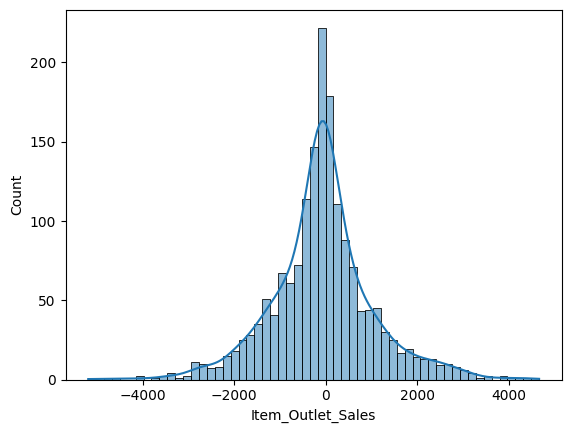

In [169]:
sns.histplot(y_test-y_pred,kde=True)
plt.show()

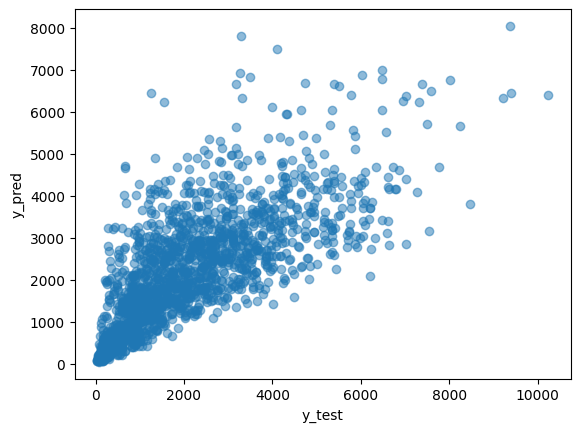

In [170]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [171]:
from sklearn import metrics

In [172]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 786.7457720879765
MSE: 1247473.5569438068
RMSE: 1116.903557584005


## Hyperparameter Tuning

    Choose following method for hyperparameter tuning
        RandomizedSearchCV --> Fast
        GridSearchCV
    Assign hyperparameters in form of dictionery
    Fit the model
    Check best paramters and best score

In [173]:
from sklearn.model_selection import RandomizedSearchCV

In [174]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [175]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [176]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [177]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  15.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  15.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [186]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [187]:
prediction = rf_random.predict(x_test)

In [188]:
metrics.r2_score(y_test,prediction)

0.5766233218856174

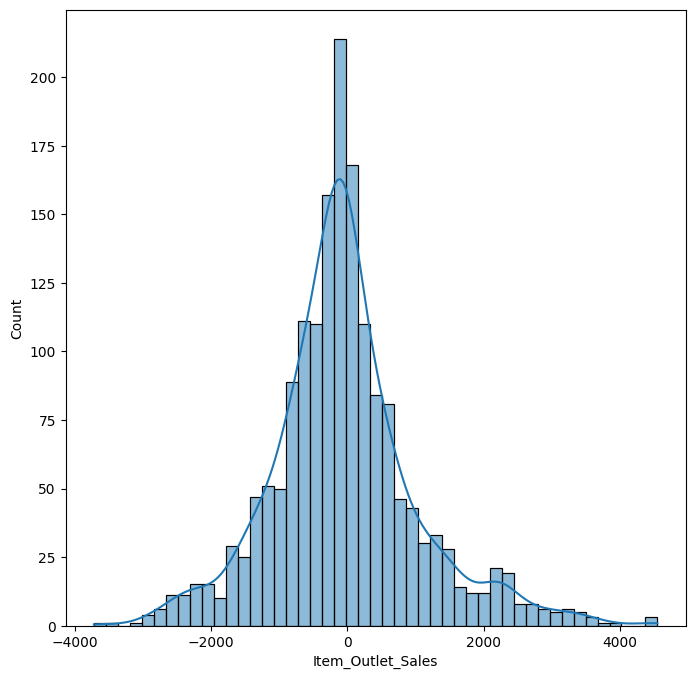

In [189]:
plt.figure(figsize = (8,8))
sns.histplot(y_test-prediction,kde=True)
plt.show()

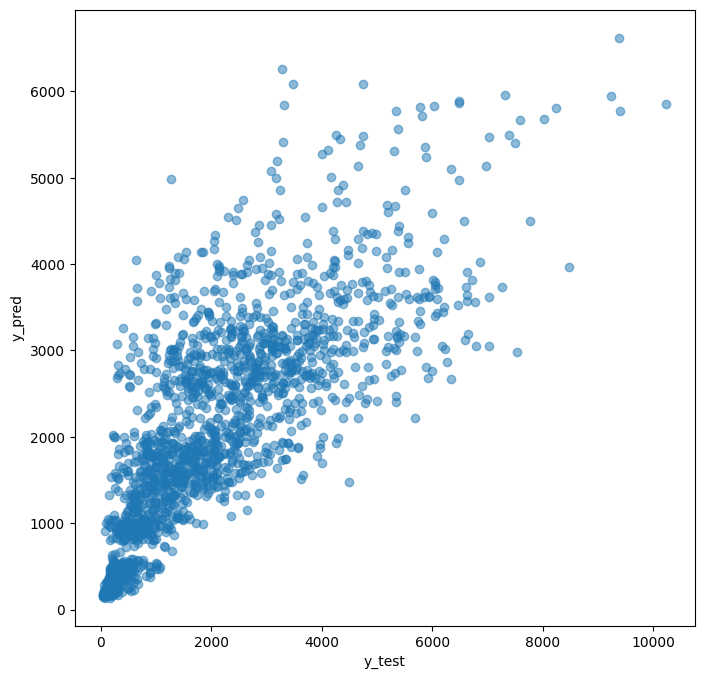

In [190]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [191]:
print('R2:', metrics.r2_score(y_test,prediction))
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


R2: 0.5766233218856174
MAE: 770.5064253851359
MSE: 1153855.870142379
RMSE: 1074.1768337393892


## Save the model to reuse it again.

In [192]:
import pickle
# open a file, where you want to store the data
file = open('rf_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)
file.close()

## Predicting test data

In [193]:
with open("rf_model.pkl","rb") as file1:
    model=pickle.load(file1)

In [194]:
test_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Visibility_MeanRatio,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,Outlet_Size_1,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
8523,20.750,0.007565,107.8622,14,1.029192,True,False,False,False,True,...,True,False,False,False,True,False,False,False,True,False
8524,8.300,0.038428,87.3198,6,1.130311,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
8525,14.600,0.099575,241.7538,15,1.735215,False,True,False,False,False,...,False,False,True,True,False,False,False,False,False,True
8526,7.315,0.015388,155.0340,6,1.291577,True,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False
8527,13.600,0.118599,234.2300,28,0.917824,False,False,True,False,True,...,False,False,True,False,False,False,True,False,True,False


In [195]:
test_df['Item_Outlet_Sales'] = (model.predict(test_df)).tolist()

In [196]:
test_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Visibility_MeanRatio,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,Outlet_Size_1,...,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2,Item_Outlet_Sales
8523,20.750,0.007565,107.8622,14,1.029192,True,False,False,False,True,...,False,False,False,True,False,False,False,True,False,1931.865814
8524,8.300,0.038428,87.3198,6,1.130311,False,False,True,False,False,...,True,False,False,True,False,False,False,True,False,1400.564683
8525,14.600,0.099575,241.7538,15,1.735215,False,True,False,False,False,...,False,True,True,False,False,False,False,False,True,650.118032
8526,7.315,0.015388,155.0340,6,1.291577,True,False,False,False,False,...,True,False,False,True,False,False,False,True,False,2347.168185
8527,13.600,0.118599,234.2300,28,0.917824,False,False,True,False,True,...,False,True,False,False,False,True,False,True,False,5620.724590


In [197]:
#Save Output dataframe in csv file
test_df.to_csv("Dataset/Test_Output.csv",index=False)

In [198]:
# END